In [70]:
import learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [71]:
df = pd.read_csv("predictive_maintenance.csv")

In [72]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [73]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [75]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [76]:
X=df.drop(['Failure Type'],axis=1)
y=df['Failure Type']
y.value_counts()
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


## Random OverSampling

# Visualizing class balance

Text(0.5, 1.0, 'Distribution of Failure Types')

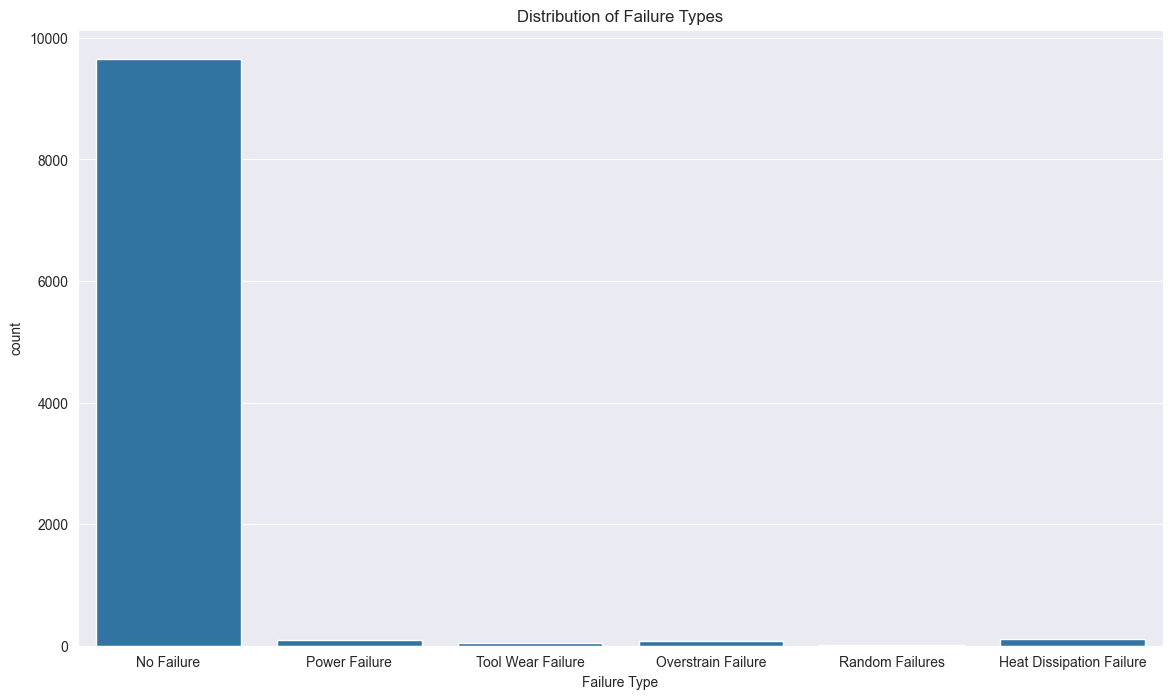

In [77]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Failure Type', data=df)
plt.title('Distribution of Failure Types')

Target
0    9661
1     339
Name: count, dtype: int64


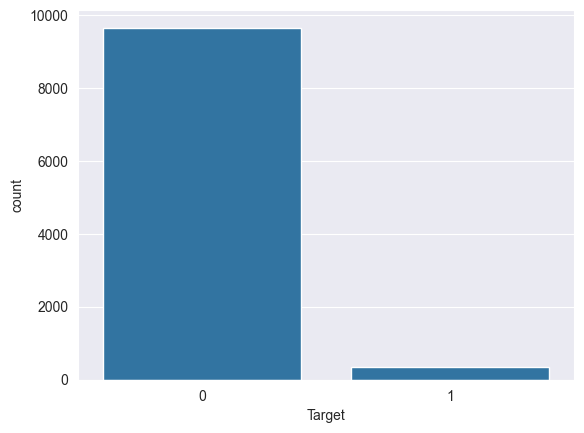

In [78]:
print(df['Target'].value_counts())
sns.countplot(x='Target', data=df)
plt.show()

# Preprocessing

In [79]:
df.drop('UDI', axis=1, inplace=True)
df.drop('Product ID', axis=1, inplace=True)
df.drop('Failure Type', axis=1, inplace=True)

In [80]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [87]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,True,False
2,298.1,308.5,1498,49.4,5,0,True,False
3,298.2,308.6,1433,39.5,7,0,True,False
4,298.2,308.7,1408,40.0,9,0,True,False
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,True
9996,298.9,308.4,1632,31.8,17,0,False,False
9997,299.0,308.6,1645,33.4,22,0,False,True
9998,299.0,308.7,1408,48.5,25,0,False,False


In [82]:
## X = df.drop('Target', axis=1)
## y = df['Target']

## RandomOverSampling

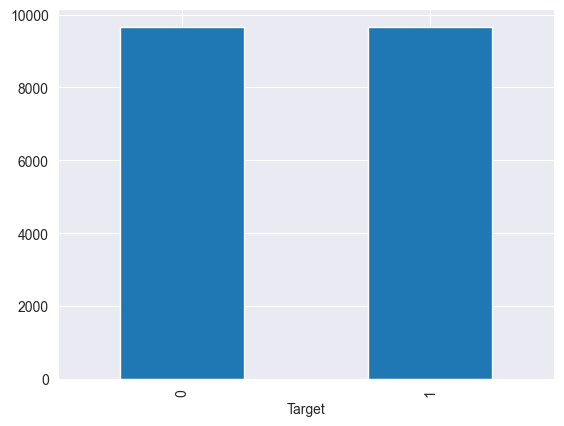

In [100]:
ros=RandomOverSampler(sampling_strategy="not majority")
X_res,y_res=ros.fit_resample(X,y)
ax=y_res.value_counts().plot(kind='bar',)
_=ax.get_legend()

df_resampled=pd.DataFrame(X_res,columns=X_res.columns)
df_resampled["Target"]=y_res
Y=df_resampled["Target"]
X=df_resampled.drop("Target",axis=1)

# Train/Test splits

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


# Training models

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced'),
    "SVM": SVC(class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1933
           1       0.83      0.84      0.83      1932

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1933
           1       0.99      1.00      1.00      1932

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865

=== SVM ===
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1933
           1       0.81      0.88      0.85      1932

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg